In [60]:
# import the necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *


from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# 1. The Ensemble
A common theme in applied Machine Learning is *The Ensemble Method*. Ensemble methods use multiple machine learning models at once. The idea is that using ensembles improves predictive performance, because even though some of the models will sometimes be incorrect, it's unlikely that a MAJORITY of the models in our ensemble will all be incorrect in the exact same way each time. Therefore in aggregate, we will get a more accurate ensemble model.

Each model predicts a category and "votes" about which category a data point should be in (ensemble methods also work for continuous outcomes, but here we'll focus on categorical ones). Models "vote" for whichever category it predicts for that data point. 

To combat overfitting and reduce potential *over-reliance* on a small number of features, we can use the two following techniques when creating models for our ensemble:

* **Bagging (Bootstrap Aggregating)**: Instead of using all of the *rows* in our training data to train each model in our sample we use **bootstrapping** to choose which rows we will include when training.
    * **Bootstrapping** is when you randomly sample data points *with replacement*, meaning that a row can be included in your bootstrapped sample *more* than once, OR not at all.
* **Random Feature Selection**: Instead of using all the available features/predictors in our dataset for every model, for each model we randomly choose a different subset of features to use when training. This helps our ensemble generalize, because it doesn't become overly reliant on one feature (since that feature might not appear in every model).

Because a predictor won't be in EVERY model in the ensemble, it prevents the ensemble from over-relying on that predictor, while still using it in SOME of the models.

While ensemble methods take a lot of computational power (you're training MANY models instead of just one), in practice they're often really useful. An incredibly popular ensemble method is the **Random Forest** which is an ensemble method that uses a bunch of decision trees along with Bagging and Random Feature selection to generate the ensemble.

To simplify: a Random Forest is a BUNCH of decision trees. Each decision tree uses a different, randomly selected group of rows/data points, and predictors/columns. Each tree gets a "vote" about which category a data point should be in. Whichever category gets the most votes, is the one chosen by our Random Forest.

## 1.1 Building a Random Forest

Let's build a tiny random forest function of our own! Write a function `Forest()` that takes in 6 arguments:

* `n_samples` (**integer**): number of bootstrapped samples to use to train each decision tree.
* `n_features` (**integer**): number of randomly selected features from your data set to use when training.
* `n_trees` (**integer**): how many decision trees to create for the ensemble.
* `max_d` (**integer**): the max_depth for all of your trees.
* `X` (**data frame**): the *already* z-scored predictor data to be used.
* `y` (**data frame**): the outcome data to be used (`X` and `y` are the same length, and the $i^{th}$ element of `X` corresponds to the $i^{th}$ element of `y`)

The function should:

1. use a for loop to create `n_trees` models and store them in a list called `forest` (yes! You can store fitted decision trees in a list!)
2. For each model you should choose use bootstrapping to sample `n_samples` data points to train each model. Remember that boostrapping means sampling WITH replacement (hint: try using [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to randomly select (*with replacement*) which row numbers/indices to use.
3. For each model, randomly select `n_features` to use to train your model. (hint: try using [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to randomly select (*withOUT replacement*) which predictor indices to use.
4. For all models, make sure you set the `max_depth`.
5. For each model, train the model (no need to use model validation, and assume X is already z-scored).
6. Return a list (`forest`) of dictonaries that look like this (where `tree` is your trained model and `samples_index` is an array of indices for the features/predictors you selected):
 ```{"tree": tree, "feats": features_index}```

In [61]:
# HINT: I'll Just Leave this hint here...

## simple bootstrapping example of names dataframe 
np.random.seed(1234)

names = ["Alex", "Charlie", "Addison", "James", "Blake", "Greg", "Daniel", "Susan", "Erik", "Georgia", "Kayne",
         "Lydia", "Peter", "Jane", "Jasper", "Link", "Rhett", "John", "Miranda", "Luke", "Leia", "Janet", "Jung",
         "Anthony", "Mark", "Torrence", "Bonnie", "Rudy", "Lisa", "Bart", "Tina", "Marie"]

names_df = pd.DataFrame({"name": names, "age": np.random.randint(17,27, len(names))})
names_df

names_index = np.random.choice(range(0,len(names)), 15, replace = True)
names_boot = names_df.iloc[names_index]

# notice how Lisa shows up more than once?

names_boot

,name,age
14,Jasper,26
19,Luke,19
7,Susan,24
28,Lisa,20
10,Kayne,25
11,Lydia,17
14,Jasper,26
28,Lisa,20
17,John,17
23,Anthony,17


In [62]:
### YOUR CODE HERE ###

def Forest(X, y, n_samples = 1000, n_features = 5, n_trees = 100, max_d = 5):
    forest = []
    
    # create n_trees models
    for i in range(0,n_trees):
        
        # 1. randomly bootstrap `n_samples` datapoints by sampling
        # row indices from X WITH replacement using np.random.choice()

        samples_index = np.random.choice(range(0,X.shape[0]), n_samples, replace = True)
        
        # 2. randomly choose `n_features` features by sampling column indices 
        # from X WITHOUT replacement using np.random.choice()

        features_index = np.random.choice(range(0, X.shape[1]), n_features, replace = False)
        
        # 3. subset X and y to only include the rows and (for X) features/predictors
        # that were selected above using .iloc[]

        samples_X = X.iloc[samples_index, features_index]
        samples_y = y.iloc[samples_index]
        
        # 4. create and fit tree using using your subsetted X and y. Make sure to set max_depth using the 
        # max_d value from this function!

        tree = DecisionTreeClassifier(max_depth=max_d)

        tree.fit(samples_X,samples_y)
        
        # 5. add dictionary of model (tree) and array of features (features_index) that you made to forest

        forest.append({"tree": tree, "feats": features_index})
    
    return(forest) 

### /YOUR CODE HERE ###

## 1.2 Use `Forest()`
Using `X_cols_df` and `y_df` (our training set) as your training set, call `Forest()` to build an ensemble model.

In [63]:
# training data load

X_cols_df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/X_cols_df.csv")
y_df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/y_df.csv")
X_cols_df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249
0,-0.272837,0.206200,1.641906,2.011086,-0.873472,0.497003,0.462470,1.775982,0.091421,-0.654229,...,0.326900,-1.081661,-2.761833,-0.227940,-0.202936,0.175920,1.145533,0.517384,-0.629482,0.951622
1,0.704831,-1.817195,-1.337849,2.006721,-0.622258,-0.784856,-2.096367,-0.280310,1.125115,-1.648478,...,1.319550,-1.597311,-0.079034,-0.147779,1.182280,1.768567,2.920293,-0.724872,0.147568,-1.026752
2,-1.361056,2.894286,0.944402,-1.415230,0.453117,2.260426,0.390655,0.025920,0.325527,-0.779292,...,-0.316042,0.325779,0.477544,-1.253684,-0.126424,0.496384,0.585087,1.208882,0.906346,-0.846152
3,-0.099394,-0.069847,1.039601,2.537628,0.238186,-0.239785,-1.532541,0.611437,1.207815,-0.779757,...,1.766062,-0.564589,1.057444,-0.881056,-1.476124,-0.496656,-0.952391,0.358682,0.449233,-0.307559
4,-0.507454,1.337364,0.937558,1.366908,0.105800,1.792870,-1.048294,-0.527191,-0.267588,0.798682,...,-0.547537,-0.173542,0.502203,-0.576244,0.784273,-1.769254,-0.265143,1.636512,-0.946507,-0.131387


In [64]:
y_df.head()

,0
0,a
1,a
2,a
3,a
4,a


In [65]:
### YOUR CODE HERE ###

my_forest = Forest(X_cols_df, y_df) ### call Forest function to create an ensemble/Random Forest using X_cols_df and y_df

### /YOUR CODE HERE ###

## 1.3 Comparing Ensemble to an Individual Model

- Use the `ForestPredictor()` function below (which takes in the ensemble created by `Forest()` and data) to generate predictions for `X_cols_df2`, our *test* set.
- Use the `ForestPredictor()` function below (which takes in the ensemble created by `Forest()` and data) to generate predictions for `X_cols_df`, our *train* set.
- calculate the accuracies (train/test) of your ensemble.
- calculate the accuracies (train/test) for ONE of your ensemble models by using `oneModel = my_forest[0]` to grab the first model of your ensemble. 

### 1.3.1
In this example, does an ensemble method do *better* (in terms of train accuracy) than an individual decision tree? Explain how you figured this out.

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

#### Answer

* The train accuracy of for the ensemble is much better than a single tree. The test accuracy for the single tree was 37% but for the whole forest it was 97.3%. This is to be expected as each tree is trained on a small, bootstrapped subset of the whole training data, so any given tree of the could vary in accuracy wildly (say for example, a weak series of predictors were chosen or all the data elements belonged to the same category). The trees individually will be very accurate with the data points of the training set that they trained with, however will likely do very poorly on data it didn't see. The whole forest mitigates the impact of these poorly made trees by letting them be outvoted by "stronger" trees that are more suited to predict the given elemnt correctly (which is usually a majority of the trees)

### 1.3.2
In this example, does an ensemble method do *better* (in terms of test accuracy) than an individual decision tree? Use `X_cols_df2` and `y_df2` as the test set.

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

#### Answer

* The ensemble method does significantly better than just a single decision tree for the test set in this example. For the entire ensemble when predicting the test set, it had an accuracy score of around 80% while the single tree had only an accuracy of around 30%. Since the single tree was one of many, it is unlikely that the tree selected would make use of the best parameters or have the best accuracy (although it is possible that any given tree would have a better accuracy score than the forest all together)
The forest is certainly bound to be more correct on average than the component trees as it should level out the strengths and weaknesses of each tree by making the trees "vote" on their prediction. 

In [66]:
def ForestPredictor(forest, X, oneModel = False):

    # takes in a list of dictionaries like below but longer, and returns predictons for them, similar to .predict()
    # [
    #     {"trees":DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
    #      max_depth=5, max_features=None, max_leaf_nodes=None,
    #      min_impurity_decrease=0.0, min_impurity_split=None,
    #      min_samples_leaf=1, min_samples_split=2,
    #      min_weight_fraction_leaf=0.0, presort='deprecated',
    #      random_state=None, splitter='best'),
    #     "feats": array([ 63, 101,  39, 133, 137])},

    #  {"trees":DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
    #      max_depth=5, max_features=None, max_leaf_nodes=None,
    #      min_impurity_decrease=0.0, min_impurity_split=None,
    #      min_samples_leaf=1, min_samples_split=2,
    #      min_weight_fraction_leaf=0.0, presort='deprecated',
    #      random_state=None, splitter='best'),
    #     "feats": array([ 63, 101,  39, 133, 137])}
    # ]
    import operator
    from collections import Counter

    ps = []

    if oneModel:
        tree = forest[0]["tree"]
        X_sub = X.iloc[:, forest[0]["feats"]]

        p = tree.predict(X_sub)
        ps.append(p)
    # get predictions from each model
    else:
        for model in forest:
            tree = model["tree"]
            X_sub = X.iloc[:, model["feats"]]

            p = tree.predict(X_sub)
            ps.append(p)

    ps = pd.DataFrame(ps)
    
    # get ensemble prediction for each data point
    predictions = []
    
    for column_ind in range(0, ps.shape[1]):
        ensemble_predict = ps.iloc[:,column_ind]
        predictions.append(ensemble_predict.mode()[0])

    return(predictions)

In [67]:
# test data load
X_cols_df2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/X_cols_df2.csv")
y_df2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/y_df2.csv")


### YOUR CODE HERE ###

# ForestPredict() will take your ensemble and use it to find the predicted values for X_cols_df2

ensemble_predictions1 = ForestPredictor(my_forest, X_cols_df2) ### Call ForestPredictor using my_forest and X_cols_df2 (the test set)
oneModel_predict1 = ForestPredictor(my_forest, X_cols_df2, oneModel=True)### get predictions for X_cols_df2 (the test set) from oneModel (the first model in our ensemble)

acc_e1 = accuracy_score(y_df2, ensemble_predictions1) ### test accuracy for ensemble
acc_o1 = accuracy_score(y_df2, oneModel_predict1) ### test accuracy for one model

print("Test Acc (Ensemble) is: ", acc_e1)
print("Test Acc (OneModel) is: ", acc_o1)

### /YOUR CODE HERE ###

Test Acc (Ensemble) is:  0.815
Test Acc (OneModel) is:  0.32


In [68]:
### YOUR CODE HERE ###

ensemble_predictions2 = ForestPredictor(my_forest, X_cols_df) ### Call ForestPredictor using my_forest and X_cols_df (the training set)
oneModel_predict2 = ForestPredictor(my_forest, X_cols_df, oneModel=True)### get predictions for X_cols_df (the training set) from oneModel (the first model in our ensemble)

acc_e2 = accuracy_score(y_df, ensemble_predictions2) ### train accuracy for ensemble
acc_o2 = accuracy_score(y_df, oneModel_predict2) ### train accuracy for one model

print("Train Acc (Ensemble) is: ", acc_e2)
print("Train Acc (OneModel) is: ", acc_o2)

### /YOUR CODE HERE ###

Train Acc (Ensemble) is:  0.973125
Train Acc (OneModel) is:  0.37


## 1.4 Comparing Ensemble to an Individual ModelS

- put the accuracy from your ENSEMBLE model in the code below
- run the cell to see a histogram of the individual tree accuracies, and the (dashed line) ensemble accuracy.

### 1.4.1
Write down your thoughts about this graph. What patterns do you see between individual tree accuracies and ensemble accuracies?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

Answer

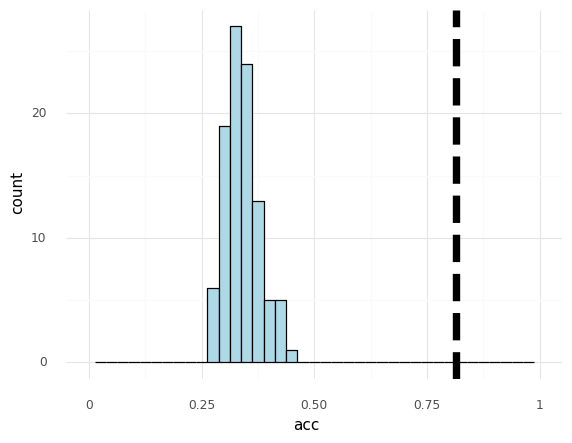

<ggplot: (118359682127)>

In [69]:
### YOUR CODE HERE ###

ensemble_acc = 0.815### put your ensemble accuracy here as a decimal

### /YOUR CODE HERE ###

allAcc = [accuracy_score(y_df2,my_forest[mod]["tree"].predict(X_cols_df2.iloc[:,my_forest[mod]["feats"]])) for mod in range(0,len(my_forest))]

df = pd.DataFrame({"acc": allAcc, "no": range(0,len(my_forest))})
(ggplot(df, aes(x = "acc")) +
 geom_histogram(color = "black", fill = "lightblue", binwidth = 0.025) +
 xlim([0,1]) + theme_minimal() + geom_vline(xintercept = ensemble_acc, linetype = "dashed", size = 3))


### 1.4.2
How does the difference between individual tree accuracies and ensemble accuracies change when you change the number of predictors used in each tree? Try 2 and 249 below. Play around with `n_feat` yourself too!
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

#### Answer

* As you increase the number of predictors for the individual trees, the accuracy of the trees goes up but the accuracy of the forest goes down after a certain threshold. After a quick few tests, it seemed somewhere around 10 predictors gave the best accuracy of the forest and the individual trees hovered around 37.5% accuracy.

0.73


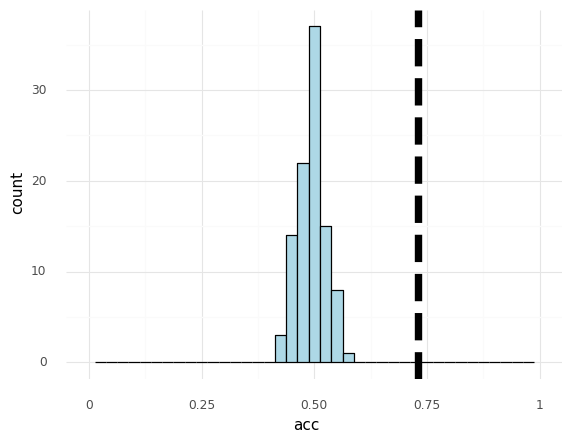

<ggplot: (118359717334)>

In [70]:
n_feat = 249

my_forest2 = Forest(X_cols_df, y_df, n_features = n_feat)

ensemble_acc2 = accuracy_score(y_df2, ForestPredictor(my_forest2, X_cols_df2))
print(ensemble_acc2)

allAcc2 = [accuracy_score(y_df2,my_forest2[mod]["tree"].predict(X_cols_df2.iloc[:,my_forest2[mod]["feats"]])) for mod in range(0,len(my_forest2))]

df = pd.DataFrame({"acc": allAcc2, "no": range(0,len(my_forest2))})
(ggplot(df, aes(x = "acc")) +
 geom_histogram(color = "black", fill = "lightblue", binwidth = 0.025) +
 xlim([0,1]) + theme_minimal() + geom_vline(xintercept = ensemble_acc2, linetype = "dashed", size = 3))


0.6575


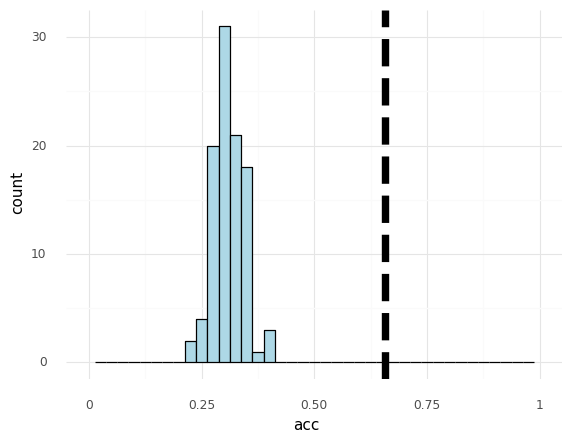

<ggplot: (118359646413)>

In [71]:
n_feat = 2


my_forest3 = Forest(X_cols_df, y_df, n_features = n_feat)

ensemble_acc3 = accuracy_score(y_df2, ForestPredictor(my_forest3, X_cols_df2))
print(ensemble_acc3)

allAcc3 = [accuracy_score(y_df2,my_forest3[mod]["tree"].predict(X_cols_df2.iloc[:,my_forest3[mod]["feats"]])) for mod in range(0,len(my_forest3))]

df = pd.DataFrame({"acc": allAcc3, "no": range(0,len(my_forest3))})
(ggplot(df, aes(x = "acc")) +
 geom_histogram(color = "black", fill = "lightblue", binwidth = 0.025) +
 xlim([0,1]) + theme_minimal() + geom_vline(xintercept = ensemble_acc3, linetype = "dashed", size = 3))


0.885


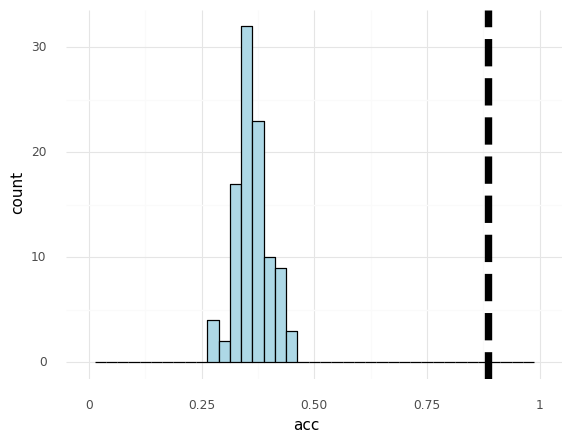

<ggplot: (118359326645)>

In [72]:
n_feat = 10


my_forest4 = Forest(X_cols_df, y_df, n_features = n_feat)

ensemble_acc4 = accuracy_score(y_df2, ForestPredictor(my_forest4, X_cols_df2))
print(ensemble_acc4)

allAcc4 = [accuracy_score(y_df2,my_forest4[mod]["tree"].predict(X_cols_df2.iloc[:,my_forest4[mod]["feats"]])) for mod in range(0,len(my_forest4))]

df = pd.DataFrame({"acc": allAcc4, "no": range(0,len(my_forest3))})
(ggplot(df, aes(x = "acc")) +
 geom_histogram(color = "black", fill = "lightblue", binwidth = 0.025) +
 xlim([0,1]) + theme_minimal() + geom_vline(xintercept = ensemble_acc4, linetype = "dashed", size = 3))

0.82


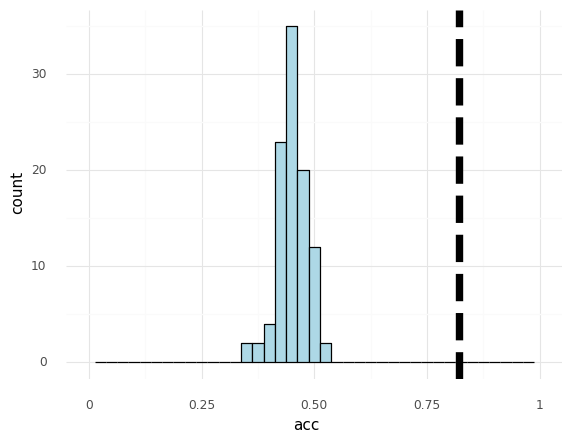

<ggplot: (118363373171)>

In [73]:
n_feat = 100


my_forest5 = Forest(X_cols_df, y_df, n_features = n_feat)

ensemble_acc5 = accuracy_score(y_df2, ForestPredictor(my_forest5, X_cols_df2))
print(ensemble_acc5)

allAcc5 = [accuracy_score(y_df2,my_forest5[mod]["tree"].predict(X_cols_df2.iloc[:,my_forest5[mod]["feats"]])) for mod in range(0,len(my_forest5))]

df = pd.DataFrame({"acc": allAcc5, "no": range(0,len(my_forest5))})
(ggplot(df, aes(x = "acc")) +
 geom_histogram(color = "black", fill = "lightblue", binwidth = 0.025) +
 xlim([0,1]) + theme_minimal() + geom_vline(xintercept = ensemble_acc5, linetype = "dashed", size = 3))

0.71


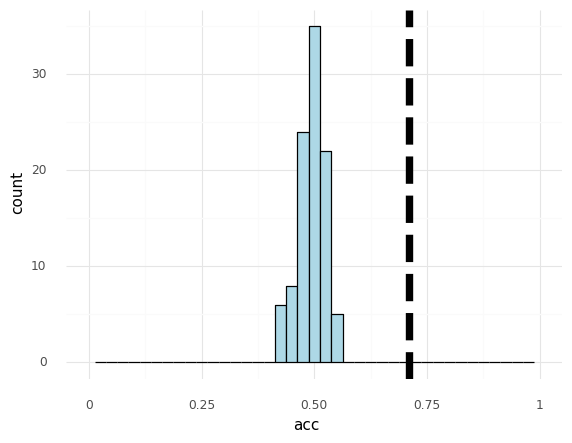

<ggplot: (118359613672)>

In [74]:
n_feat = 250


my_forest6 = Forest(X_cols_df, y_df, n_features = n_feat)

ensemble_acc6 = accuracy_score(y_df2, ForestPredictor(my_forest6, X_cols_df2))
print(ensemble_acc6)

allAcc6 = [accuracy_score(y_df2,my_forest6[mod]["tree"].predict(X_cols_df2.iloc[:,my_forest6[mod]["feats"]])) for mod in range(0,len(my_forest6))]

df = pd.DataFrame({"acc": allAcc6, "no": range(0,len(my_forest5))})
(ggplot(df, aes(x = "acc")) +
 geom_histogram(color = "black", fill = "lightblue", binwidth = 0.025) +
 xlim([0,1]) + theme_minimal() + geom_vline(xintercept = ensemble_acc6, linetype = "dashed", size = 3))

## GRADING

You'll be graded on the accuracy of your code, as well as the answers to the questions.

## Optional Extra Credit:

What do you think are some pros and cons of ensemble methods?

#### Answer

* The biggest con of the ensemble method is the time of computation. However, since each model can be fit independantly, it would make very good use of a GPU, so it isn't as costly as this single-threaded example might suggest, especially with the CRAZY graphics cards coming out right now.
* The biggest pro is the high degree of accuracy and consistency the method presents when compared to a single model (even if that model is more carefully selected than the models of the ensemble method). 